In [3]:
import sys  
sys.path.append("./src")
import fock_state_circuit as fsc
import collection_of_states as cos 
import imp
import math
import numpy as np
%matplotlib inline
imp.reload(fsc)
imp.reload(cos)

circuit = fsc.FockStateCircuit(length_of_fock_state = 5, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=0
                                )

print(circuit.conventions())


Conventions used in FockStateCircuit
1. Beamsplitters:
For beamsplitters we use the convention for a lossless dielectric beamsplitter. 
See for instance https://en.wikipedia.org/wiki/Beam_splitter#Phase_shift 
This means the generic matrix is 1/sqrt(2) [[1, 1],[1, -1]].
The minus sign is applied to light entering port b at input side and being transmitted to port b
at the output side. The user can translate to other conventions (i.e., symmetric convention)
by adding single channel phase shifts.
 
2. Phase plates:
For phase plates the 'horizontal' polarization (default channel 0) is not affected and the 
'vertical' polarization (default channel 1) receives the phase shift
So a quarter wave plate at angle of 0 degrees would apply a phase shift of 90 degrees or '1j'
to the vertical polarization. A half wave plate would apply a phase shift of 180 degrees or '-1'
to the vertical polarization. See section below on the impact of the photon number in the channel.
If we orient a phase plate at 

In [9]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 4, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                channel_0_left_in_state_name=False
                                )
circuit._use_full_fock_matrix = True
circuit.set_classical_channels(list_of_values_for_classical_channels=[math.pi/4,math.pi], list_of_classical_channel_numbers=[0,2])
circuit.swap(first_channel=2,second_channel=3)
circuit.wave_plate_classical_control(optical_channel_horizontal = 0,
                                    optical_channel_vertical = 1,
                                    classical_channel_for_orientation = 0,
                                        classical_channel_for_phase_shift = 2)
circuit.polarizing_beamsplitter(input_channels_a=(0,1),input_channels_b=(2,3))
circuit.polarizing_beamsplitter(input_channels_a=(1,0),input_channels_b=(3,2))   

name_list = ['0020','0110','1020','0101','1020','2000','0020','1010','2001','3000']
input_collection = dict([])
for name in name_list:
    input_collection.update({name: 
                                {'optical_components': 
                                    {name: {'amplitude': (1+0j), 'probability': 1.0}}, 
                                'classical_channel_values': [0,0,0], 
                                'measurement_results': {}}
                                })
    

selection_of_state_class = cos.CollectionOfStates(circuit,input_collection_as_a_dict=input_collection)
result1 = circuit.evaluate_circuit(collection_of_states_input=selection_of_state_class) 
result = result1.collection_as_dict()

desired_result = dict([])
for state_name in name_list:
    desired_result.update({state_name:{state_name[::-1]:{'amplitude': 1.0, 'probability': 1.0}}})


bool_list = []
threshold = circuit._threshold_probability_for_setting_to_zero
for input in desired_result.keys():
    for output in desired_result[input].keys():
        res = np.cdouble(result[input]['optical_components'][output]['amplitude'])
        deviation = np.abs(np.cdouble(desired_result[input][output]['amplitude']) - res)   
        bool_list.append(deviation < threshold)
print(bool_list)

[True, True, True, True, True, True, True, True]


In [10]:
circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=0, 
                                )
circuit2.quarter_wave_plate_225(channel_vertical=1,channel_horizontal=0)
circuit2.quarter_wave_plate_225(channel_vertical=1,channel_horizontal=0)

result = circuit2.evaluate_circuit()

x = math.sqrt(1/2)
desired_result = dict([])
list_of_states_unchanged = ['00', '11']
for state_identifier, state in result.items():
    if state['initial_state'] in list_of_states_unchanged:
        desired_result.update({state_identifier: {state['initial_state']:{'amplitude': 1.0, 'probability': 1.0} }})
    if state['initial_state'] == '01':
        desired_result.update({state_identifier: {'01':{'amplitude': -x, 'probability': 0.5}, '10':{'amplitude': x, 'probability': 0.5} }})
    if state['initial_state'] == '10':
        desired_result.update({state_identifier: {'10':{'amplitude': x, 'probability': 0.5}, '01':{'amplitude': x, 'probability': 0.5} }})
print(result)
print(desired_result)
bool_list = []
threshold = circuit2._threshold_probability_for_setting_to_zero
for input in desired_result.keys():
    for output in desired_result[input].keys():
        res = np.cdouble(result[input]['optical_components'][output]['amplitude'])
        deviation = np.abs(np.cdouble(desired_result[input][output]['amplitude']) - res)   
        bool_list.append(deviation < threshold)

Printing collection of states
Number of states in collection: 4
Identifier: 'identifier_0'
Initial state: '00'
Cumulative probability: 1.00
Optical components: 
	Component: '00' Amplitude: (1.00 - -0.00i), Probability: 1.00
Identifier: 'identifier_1'
Initial state: '10'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (0.71 + 0.00i), Probability: 0.50
	Component: '01' Amplitude: (0.71 - 0.00i), Probability: 0.50
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '01' Amplitude: (-0.71 + 0.00i), Probability: 0.50
Identifier: 'identifier_3'
Initial state: '11'
Cumulative probability: 1.00
Optical components: 
	Component: '11' Amplitude: (1.00 - -0.00i), Probability: 1.00

{'identifier_0': {'00': {'amplitude': 1.0, 'probability': 1.0}}, 'identifier_1': {'10': {'amplitude': 0.7071067811865476, 'probability': 0.5}, '01': {'amplitude': 0.7071067

In [11]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=10
                                )
circuit.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle = -math.pi/8)
circuit.half_wave_plate(channel_horizontal=4,channel_vertical=5, angle = math.pi/8)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[6,7,0,1,4,5],classical_channels_to_be_written=[2,3,4,5,6,7])
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter='00111100')


In [12]:
result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
print(result)
print(initial_collection_of_states)

Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_0360-M1a'
Initial state: '00111100'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '2.00', '0.00', '0.00', '0.00']
Last measurement result:  
	Value: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '2.00', '0.00', '0.00', '0.00'], Probability: 0.50
Optical components: 
	Component: '00112000' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_0360-M1b'
Initial state: '00111100'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '2.00', '0.00', '0.00']
Last measurement result:  
	Value: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '2.00', '0.00', '0.00'], Probability: 0.50
Optical components: 
	Component: '00110200' Amplitude: (-1.00 + 0.00i), Probability: 1.00

Printing collection of states
Number of states in collection: 1
Identifier: 'identifier_0360'
Initial state: '

In [13]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                            no_of_optical_channels = 8,
                            no_of_classical_channels=10
                            )
circuit.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle = -math.pi/8)
circuit.half_wave_plate(channel_horizontal=4,channel_vertical=5, angle = math.pi/8)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[6,7,0,1,4,5],classical_channels_to_be_written=[2,3,4,5,6,7])
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter='00111100')
result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
state_in = initial_collection_of_states.get_state(initial_state ='00111100')
error1 = (list(state_in.optical_components.keys()) == ['00111100'])
result1 = result.copy()
result1.filter_on_classical_channel(classical_channel_numbers=[6,7], values_to_filter=[2,0])
state_out1 = result1.get_state(initial_state = '00111100')
error2 = (list(state_out1.optical_components.keys()) == ['00112000'])
result.filter_on_classical_channel(classical_channel_numbers=[6,7], values_to_filter=[0,2])
state_out2 = result.get_state(initial_state = '00111100')
error3 = (list(state_out2.optical_components.keys()) == ['00110200'])

print(error1, error2, error3)

True True True


In [14]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=10
                                )
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
state_D1at45 = initial_collection_of_states.get_state(initial_state='00111100').copy()
state_D1at45.initial_state = 'state_D1at45'
state_D1at45.classical_channel_values = [0,0,0,0,0,0,0,0,math.pi/8,math.pi]
state_D1at0 = initial_collection_of_states.get_state(initial_state='00111100').copy()
state_D1at0.initial_state = 'state_D1at0'
state_D1at0.classical_channel_values = [0,0,0,0,0,0,0,0,0,math.pi]
initial_collection_of_states.clear()
initial_collection_of_states.add_state(state_D1at45)
initial_collection_of_states.add_state(state_D1at0)


'identifier_7'

In [15]:

circuit.polarizing_beamsplitter(input_channels_a=(0,1),input_channels_b=(2,3))
circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(4,5),input_channels_b=(6,7))
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[2,3],classical_channels_to_be_written=[0,1])
circuit.half_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit.polarizing_beamsplitter(input_channels_a=(0,1),input_channels_b=(6,7))
circuit.wave_plate_classical_control(optical_channel_horizontal=6,
                                     optical_channel_vertical=7,
                                     classical_channel_for_orientation=8,
                                     classical_channel_for_phase_shift=9)
circuit.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle = -math.pi/8)
circuit.half_wave_plate(channel_horizontal=4,channel_vertical=5, angle = math.pi/8)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[6,7,0,1,4,5],classical_channels_to_be_written=[2,3,4,5,6,7])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
result.filter_on_classical_channel(classical_channel_numbers=[0,1,2,3,4,5], values_to_filter=[1,0,1,0,1,0])
#result.plot(classical_channels = [6,7])
print(result)

Printing collection of states
Number of states in collection: 3
Identifier: 'identifier_h-M1a-M2k'
Initial state: 'state_D1at45'
Cumulative probability: 0.06
Classical values: ['1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '0.39', '3.14']
Last measurement result:  
	Value: ['1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '0.39', '3.14'], Probability: 0.06
Optical components: 
	Component: '10101010' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_7-M1a-M2k'
Initial state: 'state_D1at0'
Cumulative probability: 0.03
Classical values: ['1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '0.00', '3.14']
Last measurement result:  
	Value: ['1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '1.00', '0.00', '0.00', '3.14'], Probability: 0.03
Optical components: 
	Component: '10101010' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_7-M1a-M2m'
Initial state: 'state_D1at0'
Cumulative probability: 0.03
Classical 

In [16]:

circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=3, 
                                )
collection = cos.CollectionOfStates(circuit)
state = cos.State(collection)

print(state)

errors = []
if state.initial_state != '00' or state.cumulative_probability != 1.0 or state.classical_channel_values != [0,0,0]:
    errors.append('error1')
oc = state.optical_components
if '00' != list(oc.keys())[0] or list(oc.values())[0]['amplitude'] != np.cdouble(1) or list(oc.values())[0]['probability'] != 1.0:
    errors.append('error2')
print(errors)

state.initial_state = '11'
state.cumulative_probability = 0.5
state.classical_channel_values = [1,2,math.pi]
state.optical_components = {'11' : {'amplitude' : 0.5, 'probability' : 0.25}}
state.measurement_results = [{'measurement_results' : [0,0,0], 'probability' : 1}]

if state.initial_state != '11' or state.cumulative_probability != 0.5 or state.classical_channel_values != [1,2,math.pi]:
    errors.append('error1')
oc = state.optical_components
if '11' != list(oc.keys())[0] or list(oc.values())[0]['amplitude'] != np.cdouble(0.5) or list(oc.values())[0]['probability'] != 0.25:
    errors.append('error2')
print(errors)
print(state)

if bool(state) and state == 2 and int(state) == 2 and state.photon_number() == (2,True):
    pass
else:
    errors.append('error3')

oc = state.optical_components
oc.update({'01' : {'amplitude' : 0.5, 'probability' : 0.25}})
if bool(state) and state == 2 and int(state) == 2 and state.photon_number() == (2,False):
    pass
else:
    errors.append('error4')

state1 = state.copy()
if bool(state1) and state1 == 2 and int(state1) == 2 and state1.photon_number() == (2,False):
    pass
else:
    errors.append('error5')

state.initialize_this_state()

if bool(state1) and state1 == 2 and int(state1) == 2 and state1.photon_number() == (2,False):
    pass
else:
    errors.append('error6')

if state.initial_state != '00' or state.cumulative_probability != 1.0 or state.classical_channel_values != [0,0,0]:
    errors.append('error7')
oc = state.optical_components
if '00' != list(oc.keys())[0] or list(oc.values())[0]['amplitude'] != np.cdouble(1) or list(oc.values())[0]['probability'] != 1.0:
    errors.append('error8')


print(errors)
print('----------------------')

circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=3, 
                                )
collection_of_states = cos.CollectionOfStates(circuit)
errors = []

if len(collection_of_states) != 9:
    errors.append('error1')

collection_as_dict = collection_of_states.collection_as_dict()
if type(collection_as_dict) != type(dict([])) or len(collection_as_dict) != 9:
    errors.append('error2')

if collection_of_states.state_identifiers_as_list() != ['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7', 'state_8']:
    errors.append('error3')
if collection_of_states.initial_states_as_list() != ['00', '10', '20', '01', '11', '21', '02', '12', '22']:
    errors.append('error4')

state_in_col = collection_of_states.get_state(initial_state='00')
state_in_col.initial_state = 'test123'
collection_of_states.add_state(state_in_col, identifier = 'id_new')

if not ('test123' in collection_of_states.initial_states_as_list() and 'id_new' in collection_of_states.state_identifiers_as_list()):
    errors.append('error5')

if not (bool(collection_of_states) and len(collection_of_states) == 10):
    errors.append('error6')

collection_of_states.delete_state(identifier='id_new')
collection_of_states.delete_state(initial_state='20')

collection_as_dict = collection_of_states.collection_as_dict()
collection_of_states.clear()
if not (len(collection_as_dict) == 8 and len(collection_of_states) == 0):
    errors.append('error7')

collection_of_states.collection_from_dict(collection_of_states_as_dictionary=collection_as_dict)
if not (len(collection_of_states) == 8):
    errors.append('error8')

new_collection_of_states = collection_of_states.copy()

collection_of_states.initialize_to_default()
if not (len(new_collection_of_states) == 8 and len(collection_of_states) == 9):
    errors.append('error9')


collection_of_states.filter_on_identifier(identifier_to_filter=['state_1', 'state_3', 'state_5'])
filtered_collection = collection_of_states.copy()
filtered_collection_as_dict = filtered_collection.collection_as_dict()
if not (len(filtered_collection) == 3 and len(filtered_collection_as_dict) == 3):
    errors.append('error10')



collection_of_states.filter_on_initial_state(['10', '01'])
filtered_collection_as_dict = collection_of_states.collection_as_dict()
if not (len(collection_of_states) == 2 and len(filtered_collection_as_dict) == 2):
    errors.append('error11')

new_collection_of_states = cos.CollectionOfStates(circuit, input_collection_as_a_dict = filtered_collection_as_dict)

if new_collection_of_states.initial_states_as_list() != ['10', '01']:
    errors.append('error12')
if new_collection_of_states.state_identifiers_as_list() != ['state_1', 'state_3']:
    errors.append('error13')

state = cos.State(collection_of_states)

new_collection_of_states.add_state(identifier = 'new', state = state)
new_collection_of_states.delete_state(identifier='state_1')
if new_collection_of_states.state_identifiers_as_list() != ['state_3', 'new']:
    errors.append('error14')

print(errors)

print(new_collection_of_states)

Initial state: '00'
Cumulative probability: 1.00
Classical values: ['0.00', '0.00', '0.00']
Optical components: 
	Component: '00' Amplitude: (1.00 - -0.00i), Probability: 1.00

[]
[]
Initial state: '11'
Cumulative probability: 0.50
Classical values: ['1.00', '2.00', '3.14']
Last measurement result:  
	Value: ['0.00', '0.00', '0.00'], Probability: 1.00
Optical components: 
	Component: '11' Amplitude: (0.50 - 0.00i), Probability: 0.25

[]
----------------------
['error3', 'error10', 'error11', 'error12', 'error13', 'error14']
Printing collection of states
Number of states in collection: 1
Identifier: 'new'
Initial state: '00'
Cumulative probability: 1.00
Classical values: ['0.00', '0.00', '0.00']
Optical components: 
	Component: '00' Amplitude: (1.00 - -0.00i), Probability: 1.00



In [17]:
import fock_state_circuit as fsc
import imp
import math
import numpy as np
%matplotlib inline
imp.reload(fsc)
    

circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=3, 
                                )
def test_functie(input_list, new_values = [], affected_channels = []):
    return input_list[::-1]
circuit.use_full_fock_matrix = True
circuit.phase_shift_single_channel(channel_for_shift = 1, phase_shift = 2*math.pi)
circuit.set_classical_channels(list_of_values_for_classical_channels=[4,2,1], list_of_classical_channel_numbers=[0,1,2])
circuit.half_wave_plate_45(channel_horizontal = 0, channel_vertical = 1)
circuit.phase_shift_single_channel(channel_for_shift = 0, phase_shift = math.pi)
circuit.classical_channel_function(test_functie)
circuit.phase_shift_single_channel(channel_for_shift = 0, phase_shift = math.pi)

answer = circuit.evaluate_circuit()
for state_identifier, state in answer.items():
    if state['initial_state'] == '10':
        reference_identifier = state_identifier

circuit.pretty_print_collection_of_states(answer)
    

AttributeError: 'FockStateCircuit' object has no attribute 'pretty_print_collection_of_states'

The following table gives the 6 common examples of normalized Jones vectors.
https://en.wikipedia.org/wiki/Jones_calculus

|H\rangle  and 
|
�
⟩|V\rangle 
|
�
⟩|D\rangle  and 
|
�
⟩|A\rangle 
|
�
⟩|R\rangle and 
|
�
⟩|L\rangle

{\displaystyle {\rm {e}}^{-{\frac {i\eta }{2}}}{\begin{pmatrix}\cos ^{2}\theta +{\rm {e}}^{i\eta }\sin ^{2}\theta &\left(1-{\rm {e}}^{i\eta }\right)\cos \theta \sin \theta \\\left(1-{\rm {e}}^{i\eta }\right)\cos \theta \sin \theta &\sin ^{2}\theta +{\rm {e}}^{i\eta }\cos ^{2}\theta \end{pmatrix}}}

In [ ]:
import fock_state_circuit as fsc
import imp
import math
import numpy as np
%matplotlib inline
imp.reload(fsc)

def test_function(input_list):
    output_list = input_list[::-1]
    return output_list
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, no_of_optical_channels = 4, no_of_classical_channels = 2)
circuit.half_wave_plate(channel_horizontal=0, channel_vertical=1, angle=math.pi/8)
circuit.phase_shift_single_channel(channel_for_shift = 2, phase_shift = math.pi)
circuit.quarter_wave_plate_225(channel_horizontal=0,channel_vertical=1)


circuit.generate_overall_optical_matrix()

circuit = fsc.FockStateCircuit(length_of_fock_state = 3, no_of_optical_channels = 4, no_of_classical_channels = 3)
circuit.half_wave_plate(channel_horizontal=0, channel_vertical=1, angle=math.pi/8)
circuit.phase_shift_single_channel(channel_for_shift = 2, phase_shift = math.pi)
circuit.phase_shift_single_channel_classical_control(channel_for_shift=2,classical_channel_for_phase_shift=1)
circuit.wave_plate_classical_control(channel_horizontal = 2, channel_vertical = 0, classical_channel_for_orientation = 0, classical_channel_for_phase_shift = 2)
circuit.half_wave_plate_225(channel_horizontal=1,channel_vertical=3)
circuit.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit.quarter_wave_plate(channel_horizontal=0, channel_vertical=1, angle=0)
circuit.quarter_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit.classical_channel_function(test_function)
circuit.measure_optical_to_classical(channel_to_be_read=0,classical_channel_to_be_written=2)
circuit.draw()
for node in circuit.node_list:
    print(list(node.keys()))
    for key, val in node.items():
        print(key,"----------")
        print(val)
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, no_of_optical_channels = 4, no_of_classical_channels = 1)
circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(0,1),input_channels_b=(2,3))
circuit.generate_overall_fock_state_matrix()

list_of_states = circuit.generate_state_list_as_words()
#print(circuit.fock_state_input_output(list_of_states))
for input, output in circuit.fock_state_input_output(list_of_states).items():
    #print(input, '\n', output)
    pass
    




C:\Users\nly99857\AppData\Local\Temp\ipykernel_15156\3026293697.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


AttributeError: 'FockStateCircuit' object has no attribute 'generate_overall_fock_state_matrix'

In [ ]:
import fock_state_circuit as fsc
import imp
import math
import numpy as np
imp.reload(fsc)
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels = 4, 
                                )
circuit.set_classical_channels(list_of_values_for_classical_channels=[0,1], list_of_classical_channel_numbers=[0,2])
circuit.measure_optical_to_classical(optical_channels_to_be_read = [0], classical_channels_to_be_written = [0])
answer = circuit.evaluate_circuit()
print(answer)






{'00-Ma': {'optical_components': {'00': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [2, 0, 1, 0], 'measurement_results': {'measurement_results': [2, 0, 1, 0], 'probability': 1.0}}, '10-Ma': {'optical_components': {'10': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [2, 0, 1, 0], 'measurement_results': {'measurement_results': [2, 0, 1, 0], 'probability': 1.0}}, '20-Ma': {'optical_components': {'20': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [2, 0, 1, 0], 'measurement_results': {'measurement_results': [2, 0, 1, 0], 'probability': 1.0}}, '01-Ma': {'optical_components': {'01': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [2, 0, 1, 0], 'measurement_results': {'measurement_results': [2, 0, 1, 0], 'probability': 1.0}}, '11-Ma': {'optical_components': {'11': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [2, 0, 1, 0], 'measurement_results': {'measurement_resul

In [ ]:
x = np.array([1,2,3,4,5,6,7,8])
print(list(x[np.array([1])]))

[2]


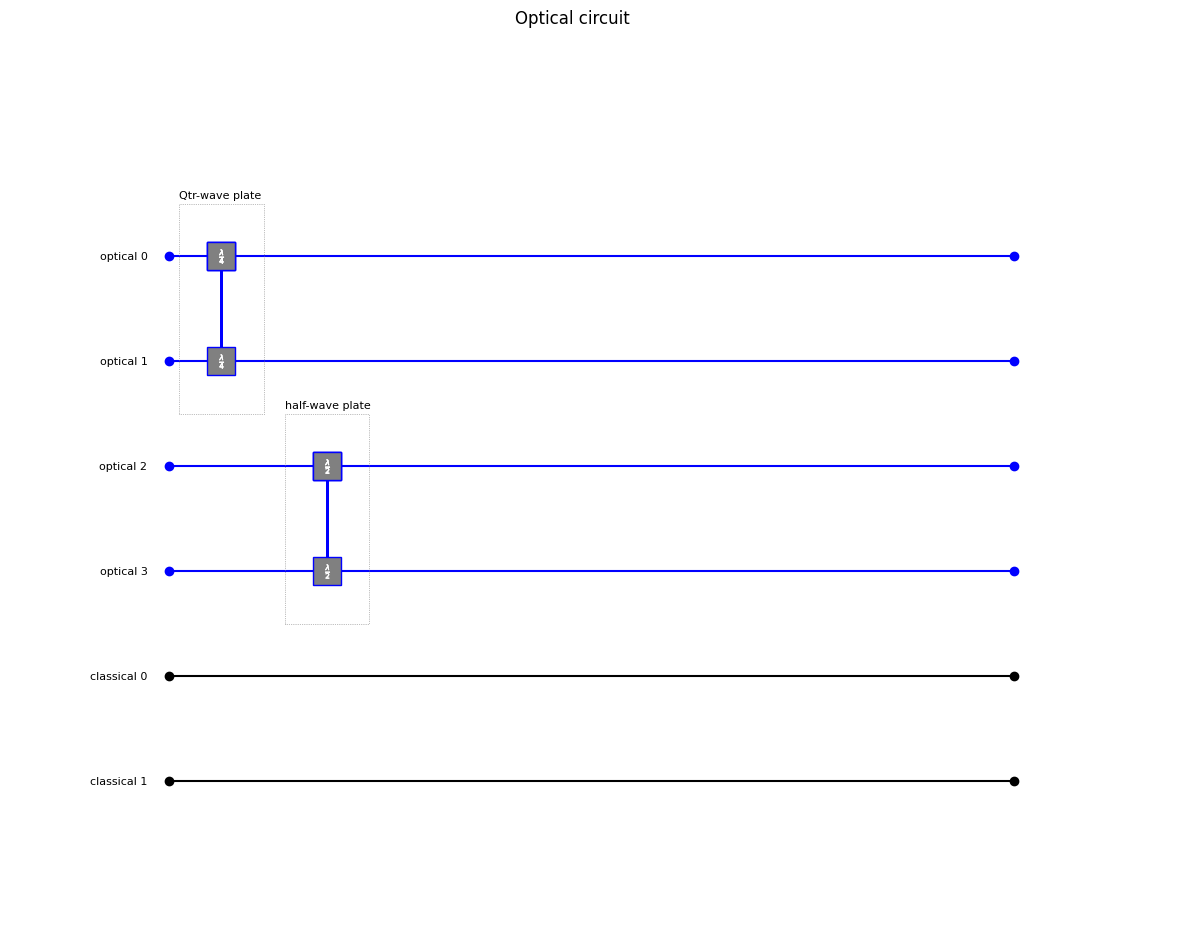

In [ ]:
    
import fock_state_circuit as fsc
import imp
import math
import numpy as np
imp.reload(fsc)

circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=2
                                )
circuit.quarter_wave_plate(channel_horizontal=0,channel_vertical=1,angle = 0)
circuit.half_wave_plate(channel_horizontal=2,channel_vertical=3,angle = 0)

result = circuit.evaluate_circuit()   
x = math.sqrt(1/2)
desired_result = {
'1000': {'1000':{'amplitude': 1, 'probability': 1}},
'0100': {'0100':{'amplitude': 1j, 'probability': 1}},
'0010': {'0010':{'amplitude': 1, 'probability': 1}},
'0001': {'0001':{'amplitude': x*(1-1j), 'probability': 1}}
}



circuit.measure_optical_to_classical(optical_channels_to_be_read=[0,1], classical_channels_to_be_written=[0,1])
    
result = circuit.evaluate_circuit()
    


circuit.draw()



In [ ]:
print(result)

{'00000': {'optical_components': {'00000': {'amplitude': (1+0j), 'probability': 1.0}}, 'classical_channel_values': [0.7853981633974483, 0, 3.141592653589793], 'measurement_results': {}}, '00001': {'optical_components': {'01000': {'amplitude': (1-1.487945925890979e-14j), 'probability': 1.0}}, 'classical_channel_values': [0.7853981633974483, 0, 3.141592653589793], 'measurement_results': {}}, '00010': {'optical_components': {'00100': {'amplitude': (1-1.2246468525851679e-16j), 'probability': 1.0}}, 'classical_channel_values': [0.7853981633974483, 0, 3.141592653589793], 'measurement_results': {}}, '00100': {'optical_components': {'00010': {'amplitude': (1-1.2246468525851679e-16j), 'probability': 1.0}}, 'classical_channel_values': [0.7853981633974483, 0, 3.141592653589793], 'measurement_results': {}}, '01000': {'optical_components': {'00001': {'amplitude': (1-1.5001923944168306e-14j), 'probability': 1.0}}, 'classical_channel_values': [0.7853981633974483, 0, 3.141592653589793], 'measurement_r

In [ ]:
import numpy as np
x = np.arange(49).reshape(7, 7)
y = x
print(x)
order = np.array([1,0,3,2,5,4,6], dtype=np.intp)
x = x[np.ix_(order, order)]
print(x)
selection = np.array([0,2,4,6], dtype=np.intp)
x =x[np.ix_(selection, selection)]
print(x)
order = order[np.ix_(selection)]
print(order)
y = y[np.ix_(order, order)]
print(y)




[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]
[[ 8  7 10  9 12 11 13]
 [ 1  0  3  2  5  4  6]
 [22 21 24 23 26 25 27]
 [15 14 17 16 19 18 20]
 [36 35 38 37 40 39 41]
 [29 28 31 30 33 32 34]
 [43 42 45 44 47 46 48]]
[[ 8 10 12 13]
 [22 24 26 27]
 [36 38 40 41]
 [43 45 47 48]]
[1 3 5 6]
[[ 8 10 12 13]
 [22 24 26 27]
 [36 38 40 41]
 [43 45 47 48]]


In [ ]:
total_number_of_measurement_nodes_in_the_circuit=1
str(len(str(total_number_of_measurement_nodes_in_the_circuit)))

'1'

In [ ]:
length_of_fock_state, no_of_channels = 5 ,3
reverse = False
index_list = [index for index in range(0,length_of_fock_state**no_of_channels)]
state_list = [[] for index in index_list]
for _ in range(0,no_of_channels):
    for index in range(len(index_list)):
        n = int(index_list[index]%length_of_fock_state)
        state_list[index].append(n)
        index_list[index] = int(index_list[index]/length_of_fock_state)
print(state_list)

order_channels = [1,0,2]
if not len(order_channels) == no_of_channels:
    print('error')

new_state_list = []
for state in state_list:
    new_state = [state[index] for index in order_channels]
    new_state_list.append(new_state)

print(new_state_list)

new_order = [state_list.index(new_state_list[i]) for i in range(len(new_state_list))]

print(new_order)

for word in state_list:
    print(''.join([str(c) for c in word]))



[[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0], [0, 1, 0], [1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0], [0, 2, 0], [1, 2, 0], [2, 2, 0], [3, 2, 0], [4, 2, 0], [0, 3, 0], [1, 3, 0], [2, 3, 0], [3, 3, 0], [4, 3, 0], [0, 4, 0], [1, 4, 0], [2, 4, 0], [3, 4, 0], [4, 4, 0], [0, 0, 1], [1, 0, 1], [2, 0, 1], [3, 0, 1], [4, 0, 1], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1], [4, 1, 1], [0, 2, 1], [1, 2, 1], [2, 2, 1], [3, 2, 1], [4, 2, 1], [0, 3, 1], [1, 3, 1], [2, 3, 1], [3, 3, 1], [4, 3, 1], [0, 4, 1], [1, 4, 1], [2, 4, 1], [3, 4, 1], [4, 4, 1], [0, 0, 2], [1, 0, 2], [2, 0, 2], [3, 0, 2], [4, 0, 2], [0, 1, 2], [1, 1, 2], [2, 1, 2], [3, 1, 2], [4, 1, 2], [0, 2, 2], [1, 2, 2], [2, 2, 2], [3, 2, 2], [4, 2, 2], [0, 3, 2], [1, 3, 2], [2, 3, 2], [3, 3, 2], [4, 3, 2], [0, 4, 2], [1, 4, 2], [2, 4, 2], [3, 4, 2], [4, 4, 2], [0, 0, 3], [1, 0, 3], [2, 0, 3], [3, 0, 3], [4, 0, 3], [0, 1, 3], [1, 1, 3], [2, 1, 3], [3, 1, 3], [4, 1, 3], [0, 2, 3], [1, 2, 3], [2, 2, 3], [3, 2, 3], [4, 2, 3], [0, 3, 3]

100
